# Exercise 1: House price levels and dispersion

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    To familiarize yourself with the data, report the columns present in the DataFrame and 
    then restrict the data to the columns `SalePrice` (price in thousands of US dollars) 
    and `Neighborhood` (abbreviated name of the neighborhood).
    
    Check that there are no observations with missing values in the final data set.

2.  Compute the average house price (column `SalePrice`) by neighborhood (column `Neighborhood`). List the three most expensive neighborhoods, for example by using [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

    Create a bar chart showing the average sale price for all neighborhoods in descending order.

    *Hint:* You can create the bar chart by either using pandas's 
    [`DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
    or Matplotlib's
    [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

3.  You want to quantify the price dispersion in each neighborhood. To this end, compute the standard deviation of the sale price by neighborhood using 
    [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Which are the three neighborhoods with the most dispersed prices?

4.  Create a scatter plot with the average house price on the $x$-axis and the standard deviation on the $y$-axis.
    Is there a relationship between the average house prices and their dispersion within neighborhood?

    *Hint:* You can create the scatter plot by either using pandas's 
    [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
    or Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

## Solution

#### Part 1: Loading the data

In [1]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = "../../data"

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H25/main/data'

In [2]:
import pandas as pd

# Path to Ames housing CSV file
fn = f"{DATA_PATH}/ames_houses.csv"

# Read in file
df = pd.read_csv(fn)

# Report columns present in the DataFrame
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           2930 non-null   float64
 1   Neighborhood      2930 non-null   object 
 2   OverallQuality    2930 non-null   int64  
 3   OverallCondition  2930 non-null   int64  
 4   YearBuilt         2930 non-null   int64  
 5   YearRemodeled     2930 non-null   int64  
 6   BuildingType      2767 non-null   object 
 7   CentralAir        2930 non-null   object 
 8   LivingArea        2930 non-null   float64
 9   Bathrooms         2930 non-null   int64  
 10  Bedrooms          2930 non-null   int64  
 11  Fireplaces        2930 non-null   int64  
 12  SalePrice         2930 non-null   float64
 13  YearSold          2930 non-null   int64  
 14  MonthSold         2930 non-null   int64  
 15  HasGarage         2930 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory

In [3]:
# Keep only the columns SalePrice and Neighborhood
df = df[["SalePrice", "Neighborhood"]]

To check whether there are any missing values, we can for example use `info()` with `show_counts=True`:

In [4]:
N = len(df)
print(f"Total number of observations: {N:,d}\n")

# Print number of non-missing observations
df.info(show_counts=True)

Total number of observations: 2,930

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     2930 non-null   float64
 1   Neighborhood  2930 non-null   object 
dtypes: float64(1), object(1)
memory usage: 45.9+ KB


Since the number of non-missing observations is the same as the number of total observations, there are no missing values in the data.

#### Part 2: Average sale price by neighborhood

In [5]:
# Group data by neighborhood
groups = df.groupby("Neighborhood")

# Compute mean house price by neighborhood
mean_price = groups["SalePrice"].mean()

# Print first 10 entries, rounded to 1 decimal place
mean_price.head(10).round(1)

Neighborhood
Blmngtn    196.7
Blueste    143.6
BrDale     105.6
BrkSide    124.8
ClearCr    208.7
CollgCr    201.8
Crawfor    207.6
Edwards    130.8
Gilbert    190.6
Greens     193.5
Name: SalePrice, dtype: float64

These means are not sorted, so we have to use `sort_values()` to sort them.


In [6]:
# Sort in descending order, with highest values on top
mean_price = mean_price.sort_values(ascending=False)

# Print the 3 neighborhoods with the highest average price, rounded to 1 decimal place
mean_price.head(3).round(1)

Neighborhood
NoRidge    330.3
StoneBr    324.2
NridgHt    322.0
Name: SalePrice, dtype: float64

If we are not interested in any of the intermediate objects, we can chain all these operations into a single line as follows:

In [7]:
# Print the 3 neighborhoods with the most expensive average price
df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head(3).round(1)

Neighborhood
NoRidge    330.3
StoneBr    324.2
NridgHt    322.0
Name: SalePrice, dtype: float64

Finally, we can use the pandas plotting functionality to create a bar chart of average house prices:

<Axes: title={'center': 'Average house price by neighborhood'}, xlabel='Neighborhood', ylabel='Thousands of USD'>

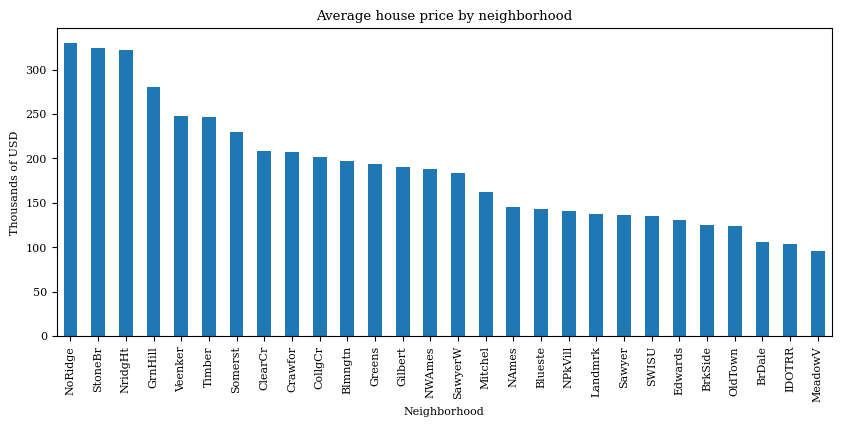

In [8]:
mean_price.plot.bar(
    title="Average house price by neighborhood",
    ylabel="Thousands of USD",
    figsize=(10, 4),
)

Alternatively, this can be achieved using the Matplotlib API as follows:

Text(0.5, 1.0, 'Average house price by neighborhood')

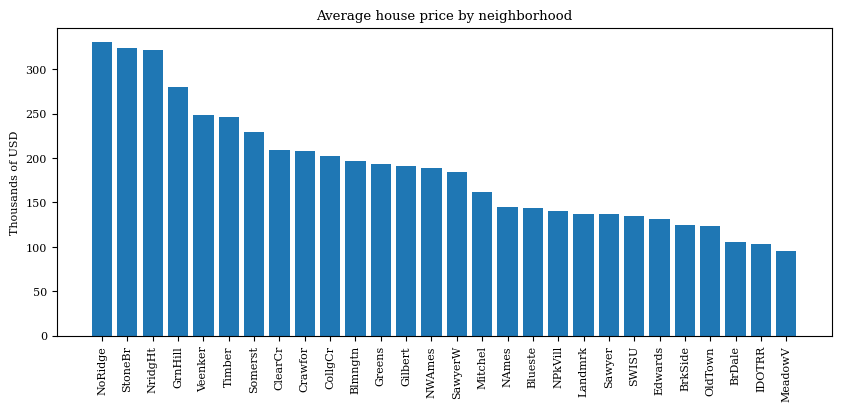

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
plt.bar(mean_price.index, mean_price)
# Rotate x-axis labels by 90 degrees to avoid overlap
plt.tick_params(axis="x", rotation=90)
plt.ylabel("Thousands of USD")
plt.title("Average house price by neighborhood")

#### Part 3: House price dispersion within neighborhoods

Computing the standard deviation and sorting in descending order is performed in exactly the same way as for the mean:

In [10]:
# Print the 3 neighborhoods with the most expensive average price
std_price = df.groupby("Neighborhood")["SalePrice"].std().sort_values(ascending=False)

# Print the 3 neighborhoods with the most dispersed prices
std_price.head(3).round(1)

Neighborhood
StoneBr    119.3
NoRidge    101.4
NridgHt     95.9
Name: SalePrice, dtype: float64

#### Part 4: Price level vs dispersion

Next, we create a scatter plot which visualizes the relationship between average house prices and the dispersion within each neighborhood.

If we want to use the pandas plotting functions, we first need to combine the mean and standard deviation into a single data frame. 
We could do this using the [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function, but instead we'll choose
to recompute the mean and standard deviation in a single call to 
[`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html):

In [11]:
# Compute statistics of interest (mean, std) in a single call to agg()
df_stats = df.groupby("Neighborhood")["SalePrice"].agg(['mean', 'std'])

We can then use the pandas 
[`scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
method to create the scatter plot:

<Axes: title={'center': 'Average house price vs. standard deviation by neighborhood'}, xlabel='Average house price (thousand USD)', ylabel='Standard deviation (thousand USD)'>

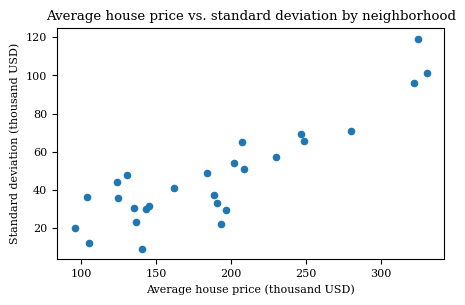

In [12]:
df_stats.plot.scatter(
    x="mean",
    y="std",
    title="Average house price vs. standard deviation by neighborhood",
    xlabel="Average house price (thousand USD)",
    ylabel="Standard deviation (thousand USD)",
    figsize=(5, 3),
)

Alternatively, we can create the scatter plot using Matplotlib's own
[`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html):

Text(0, 0.5, 'Standard deviation (thousand USD)')

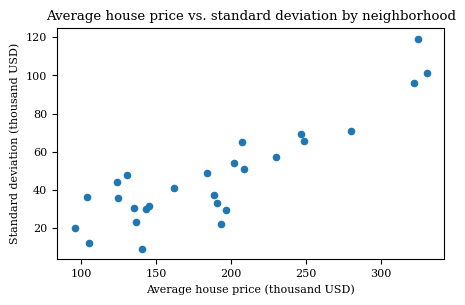

In [13]:
# Create scatter plot using Matplotlib functions
plt.figure(figsize=(5, 3))
plt.scatter(df_stats["mean"], df_stats["std"], s=20)
plt.title("Average house price vs. standard deviation by neighborhood")
plt.xlabel("Average house price (thousand USD)")
plt.ylabel("Standard deviation (thousand USD)")

As the scatter plot shows, there is a positive relationship between the average house price and the dispersion of prices as measured by the standard deviation.

***
# Exercise 2: Determinants of house prices

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa,
to understand how house prices vary with selected house characteristics.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    Keep only the columns `SalePrice` (price in thousands of US dollars), `LotArea` (lot area in m²), `YearBuilt`, and `Bedrooms` (number of bedrooms).

    Restrict your data set to houses with one or more bedrooms and a lot area of at least 100m².

2.  Compute the average year in which a house was built (using the column `YearBuilt`). 

    Create a new column `New` which takes on the value of 1 if the house was built 
    after the average year of construction in the sample (_"new"_), and 0 otherwise (_"old"_). 

    What is the average year of construction within these two categories?

3.  Create a new column `Rooms` which categorizes the number of `Bedrooms` into three groups: 1, 2, and 3 or more. You can create these categories using boolean indexing, [`np.where()`](https://numpy.org/doc/2.0/reference/generated/numpy.where.html), pandas's [`where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html), or some other way.

4.  Compute the mean sale price within each group formed by `New` and `Rooms` (for a total of 6 different categories).

    What is the average price difference between an old house with 1 bedroom and a new house with 3+ bedrooms?

5.  Create a figure with two subplots arranged in two columns. The left column should contain a bar chart showing
    the average house price by the number of bed rooms (1, 2, 3+) for _old_ houses, whereas the 
    right column should show the corresponding bars for _new_ houses.

## Solution

#### Part 1: Loading the data

In [14]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = "../../data"

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H25/main/data'

In [15]:
import pandas as pd

# Path to Ames housing CSV file
fn = f"{DATA_PATH}/ames_houses.csv"

# Read in file
df = pd.read_csv(fn)

In [16]:
# Restrict DataFrame to columns used in this exercise
df = df[["SalePrice", "LotArea", "YearBuilt", "Bedrooms"]]

In [17]:
# Drop observations with zero bedrooms and small lot areas
df = df.query("Bedrooms > 0 & LotArea > 100").copy()

In [18]:
# Total number of observations in the final sample
print(f'Number of observations in final sample: {len(df):,d}')

Number of observations in final sample: 2,922


#### Part 2: Indicator for old/new houses

We first compute the average year in which the houses in the sample were built which we'll use below to categorize houses as _"old"_ or _"new"_.

In [19]:
# Compute the average year in which houses were built
mean_year = df["YearBuilt"].mean()
print(f"Average year of construction: {mean_year:.1f}")

Average year of construction: 1971.3


We create the `New` indicator as the result of a logical comparison. Note that this creates a boolean data type, i.e., one with values `True` and `False`. We could additionally convert this column to type `int` to obtain 0's (`False`) and 1's (`True`) instead, but it does not change any of the computations below.

In [20]:
# Create indicator for whether a house was built after the average year
df['New'] = df["YearBuilt"] > mean_year

# Tabulate the average year of construction for new/old houses
df.groupby("New")["YearBuilt"].mean().round(1)

New
False    1945.1
True     1995.7
Name: YearBuilt, dtype: float64

As you can see, among the _"old"_ houses the average year of construction was 1945, whereas _"new"_ houses were built around 1996 on average. 

#### Part 3: Number of bedrooms

There are several ways to recode the `Bedrooms` column into the categories 1, 2, and 3 or more. The code below shows several common approaches:

In [21]:
# Alternative using boolean indexing
df["Rooms"] = df["Bedrooms"]

# Create indicator for 3 or more bedrooms
three_plus = df["Rooms"] >= 3

# Replace all observations with 3 or more bedrooms with the value 3
df.loc[three_plus, "Rooms"] = 3

In [22]:
# Alternative using DataFrame.where()
df["Rooms"] = df["Bedrooms"].where(df["Bedrooms"] <= 2, 3)

In [23]:
import numpy as np

# Alternative using np.where()
df["Rooms"] = np.where(df["Bedrooms"] <= 2, df["Bedrooms"], 3)

In [24]:
# Alternative using min()
df["Rooms"] = np.fmin(df["Bedrooms"], 3)

We can use [`pd.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to verify that the mapping of rooms worked as intended:

In [25]:
# Cross-tabulate the new column Rooms vs. Bedrooms
pd.crosstab(df["Bedrooms"], df["Rooms"])

Rooms,1,2,3
Bedrooms,,,
1,112,0,0
2,0,743,0
3,0,0,1597
4,0,0,400
5,0,0,48
6,0,0,21
8,0,0,1


This table shows that houses with three or more rooms are mapped into the category with 3 rooms, as intended.

#### Part 4: House prices by category

In [26]:
# Compute mean house price within each category
mean_prices = df.groupby(["New", "Rooms"])["SalePrice"].mean()
mean_prices.round(1)

New    Rooms
False  1        101.4
       2        117.5
       3        146.5
True   1        226.6
       2        211.0
       3        224.0
Name: SalePrice, dtype: float64

In [ ]:
# Difference of average sales price of old homes with 1 bedroom vs 
# new houses with 3+ bedrooms
diff = mean_prices.loc[True, 3] - mean_prices.loc[False, 1]

print(f"Price difference for old 1-bedroom vs. new 3-bedroom houses: {diff:,.1f} thousand USD")

Price difference for old 1-bedroom vs. new 3-bedroom houses: 122.6 thousand USD


#### Part 5: Plot house prices by category

Text(0.5, 0, 'Number of rooms')

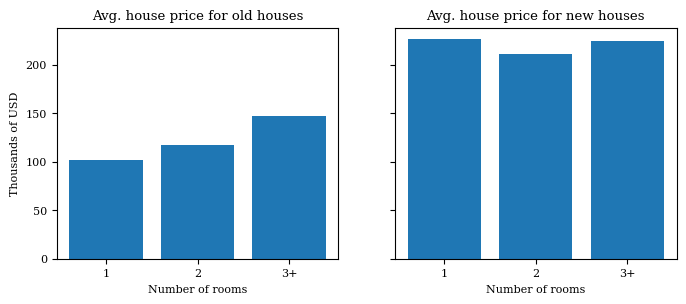

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Create x-values with string to accommodate the 3+ category
xvalues = ["1", "2", "3+"]

# Create bar charts for old houses
axes[0].bar(xvalues, mean_prices.loc[False])
axes[0].set_title("Avg. house price for old houses")
axes[0].set_ylabel("Thousands of USD")
axes[0].set_xlabel("Number of rooms")

# Create bar charts for new houses
axes[1].bar(xvalues, mean_prices.loc[True])
axes[1].set_title("Avg. house price for new houses")
axes[1].set_xlabel("Number of rooms")

***
# Exercise 3: Inflation and unemployment in the US

In this exercise, you'll be working with selected macroeconomic variables for the United States reported at monthly frequency obtained from [FRED](https://fred.stlouisfed.org/).
The data set starts in 1948 and contains observations for a total of 864 months.

1.  Load the data from the file `FRED_monthly.csv` located in the `data/FRED` folder. Print the first 10 observations to get an idea how the data looks like.
    
    Keep only the columns `Year`, `Month`, `CPI`, and `UNRATE`. Moreover, perform this analysis only on observations prior to 1970 and drop the rest.

2.  The column `CPI` stores the consumer price index (CPI) for the US. You may be more familiar with the concept of inflation, which is the percent change of the CPI relative to the previous period. 
    Create a new column `Inflation` which contains the _annual_ inflation _in percent_ relative to the same month in the previous year by applying 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to the column `CPI`.

    *Hints:* 
    
    -   Since this is monthly data, you need to pass the argument `periods=12` to `pct_change()` to get annual percent changes.
    -   You need to multiply the values returned by `pct_change()` by 100 to get percent values.

3.  Compute the average unemployment rate (column `UNRATE`) over the whole sample period. Create a new column `UNRATE_HIGH` that contains an indicator whenever the unemployment rate is above its average value (_"high unemployment period"_). 
    -   How many observations fall into the high- and the low-unemployment periods?
    -   What is the average unemployment rate in the high- and low-unemployment periods?

4.  Compute the average inflation rate for high- and low-unemployment periods. Is there any difference?

    Visualize this relationship by creating a scatter plot with the unemployment rate on the $x$-axis and inflation on the $y$-axis, and assign different colors 
    to observations from the low and high unemployment periods.

5.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to aggregate
    the inflation data to annual frequency and compute the average inflation within each calendar year.

    -   Report the three years with the highest inflation rates.
    -   Create a plot that shows the average annual inflation over the sample period.

    *Hint:* Use the resampling rule `'YE'` when calling `resample()`.


## Solution

#### Part 1: Loading the data

In [29]:
# Uncomment this to use files in the local data/ directory
DATA_PATH = "../../data"

# Uncomment this to load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/TECH2-H25/main/data'

In [30]:
import pandas as pd

# Path to monthly FRED data
fn = f"{DATA_PATH}/FRED/FRED_monthly.csv"

# Read in file
df = pd.read_csv(fn, parse_dates=['DATE'], index_col='DATE')

# Print columns present in the DataFrame
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 924 entries, 1948-01-01 to 2024-12-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      924 non-null    int64  
 1   Month     924 non-null    int64  
 2   CPI       924 non-null    float64
 3   UNRATE    924 non-null    float64
 4   FEDFUNDS  846 non-null    float64
 5   REALRATE  516 non-null    float64
 6   LFPART    924 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 57.8 KB


In [31]:
# Print first 10 observations
df.head(10)

,Year,Month,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,,,
1948-01-01,1948,1,23.7,3.4,NaN,NaN,58.6
1948-02-01,1948,2,23.7,3.8,NaN,NaN,58.9
1948-03-01,1948,3,23.5,4.0,NaN,NaN,58.5
1948-04-01,1948,4,23.8,3.9,NaN,NaN,59.0
1948-05-01,1948,5,24.0,3.5,NaN,NaN,58.3
1948-06-01,1948,6,24.2,3.6,NaN,NaN,59.2
1948-07-01,1948,7,24.4,3.6,NaN,NaN,59.3
1948-08-01,1948,8,24.4,3.9,NaN,NaN,58.9
1948-09-01,1948,9,24.4,3.8,NaN,NaN,58.9


In [32]:
# Keep only columns of interest for this analysis
df = df[["Year", "Month", "CPI", "UNRATE"]]

# Keep only periods before 1970
df = df.query("Year < 1970")

#### Part 2: Compute annual inflation

In [33]:
# Compute inflation as the percent change of the CPI
df["Inflation"] = df["CPI"].pct_change(periods=12) * 100

# Print first 15 observations
df.head(15)

,Year,Month,CPI,UNRATE,Inflation
DATE,,,,,
1948-01-01,1948,1,23.7,3.4,NaN
1948-02-01,1948,2,23.7,3.8,NaN
1948-03-01,1948,3,23.5,4.0,NaN
1948-04-01,1948,4,23.8,3.9,NaN
1948-05-01,1948,5,24.0,3.5,NaN
1948-06-01,1948,6,24.2,3.6,NaN
1948-07-01,1948,7,24.4,3.6,NaN
1948-08-01,1948,8,24.4,3.9,NaN
1948-09-01,1948,9,24.4,3.8,NaN


Note that the first 12 observations of `Inflation` are missing since it is not possible to compute 12-month percent changes due to missing data.

#### Part 3: Unemployment rates

In [34]:
# Compute and report average unemployment rate
unrate_avg = df["UNRATE"].mean()
print(f"Average unemployment rate: {unrate_avg:.1f}%")

Average unemployment rate: 4.7%


In [35]:
# Create indicator for above-average unemployment rate
df["UNRATE_HIGH"] = df["UNRATE"] > unrate_avg

# Tabulate number of periods with above and below-average unemployment
df["UNRATE_HIGH"].value_counts()

UNRATE_HIGH
False    141
True     123
Name: count, dtype: int64

In [36]:
# Tabulate average unemployment rate in high- and low-unemployment periods
df.groupby("UNRATE_HIGH")["UNRATE"].mean()

UNRATE_HIGH
False    3.697872
True     5.781301
Name: UNRATE, dtype: float64

#### Part 4: Inflation in low/high unemployment periods

In [37]:
# Compute average inflation in high- and low-unemployment periods
df.groupby("UNRATE_HIGH")["Inflation"].mean()

UNRATE_HIGH
False    3.110456
True     0.942056
Name: Inflation, dtype: float64

Next, we visualize this relationship using a scatter plot that assigns different colors to periods with low- and high-unemployment rates.

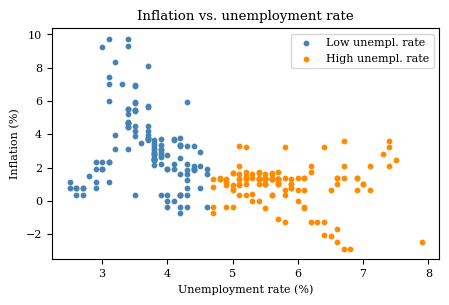

In [38]:
import matplotlib.pyplot as plt

df_hi = df.loc[df["UNRATE_HIGH"]]
df_lo = df.loc[~df["UNRATE_HIGH"]]

plt.figure(figsize=(5, 3))
plt.scatter(df_lo["UNRATE"], df_lo["Inflation"], label="Low unempl. rate", color="steelblue", s=10)
plt.scatter(df_hi["UNRATE"], df_hi["Inflation"], label="High unempl. rate", color="darkorange", s=10)
plt.xlabel("Unemployment rate (%)")
plt.ylabel("Inflation (%)")
plt.title("Inflation vs. unemployment rate")
plt.legend()

Note that with `scatter()` it is also possible to specify diffent colors for each dot, so we could just as well create this plot in a simpler way without splitting the data into low- and high-unemployment periods.

Text(0.5, 1.0, 'Inflation vs. unemployment rate')

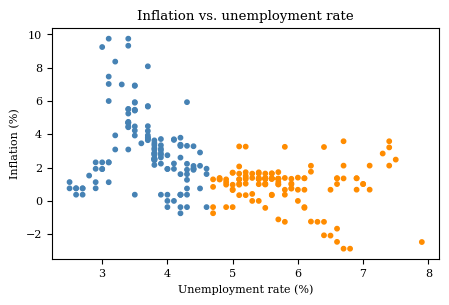

In [39]:
# Colors for low- and high-unemployment periods
colors = np.array(['steelblue', 'darkorange'])

plt.figure(figsize=(5, 3))

# Specify colors based on the UNRATE_HIGH indicator
plt.scatter(df["UNRATE"], df["Inflation"], color=colors[df["UNRATE_HIGH"].astype(int)], s=10)
plt.xlabel("Unemployment rate (%)")
plt.ylabel("Inflation (%)")
plt.title("Inflation vs. unemployment rate")

#### Part 5: Average annual inflation

In [40]:
# Create groups based on calendar year
groups = df.resample("YE")

# Compute average inflation in each year
infl_avg = groups["Inflation"].mean()

# Sort in descending order and print the three years with highest average inflation
infl_avg.sort_values(ascending=False).head(3)

DATE
1951-12-31    7.987456
1969-12-31    5.432647
1968-12-31    4.241319
Name: Inflation, dtype: float64

Alternatively, you can perform these actions in one line:

In [41]:
df.resample("YE")["Inflation"].mean().sort_values(ascending=False).head(3)

DATE
1951-12-31    7.987456
1969-12-31    5.432647
1968-12-31    4.241319
Name: Inflation, dtype: float64

To plot the average annual inflation for each year, we use pandas's plotting functions:

<Axes: title={'center': 'Average annual inflation'}, xlabel='Year', ylabel='Inflation (%)'>

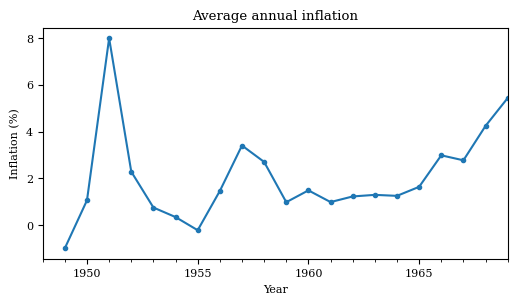

In [42]:
infl_avg.plot.line(
    xlabel="Year",
    ylabel="Inflation (%)",
    title="Average annual inflation",
    figsize=(6, 3),
    marker="o",
    ms=3,
)